## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4           Y
0  72.801362  1502.003009  0.094760   4.669595  159.912399
1  86.487907   962.046339  0.786032   7.842917  761.141637
2  39.518288   409.140286  0.819841   3.057841  337.692328
3  67.408483  1178.342753  0.506613  10.534556  600.706385
4  58.421253  1400.265828  0.508973   5.494983  715.067949


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0225738	total: 56.9ms	remaining: 56.8s
1:	learn: 1.0117417	total: 57.3ms	remaining: 28.6s
2:	learn: 1.0019245	total: 57.9ms	remaining: 19.2s
3:	learn: 0.9903278	total: 58.3ms	remaining: 14.5s
4:	learn: 0.9766625	total: 58.7ms	remaining: 11.7s
5:	learn: 0.9651241	total: 59.1ms	remaining: 9.79s
6:	learn: 0.9511894	total: 59.6ms	remaining: 8.46s
7:	learn: 0.9384190	total: 60.4ms	remaining: 7.49s
8:	learn: 0.9263909	total: 61ms	remaining: 6.71s
9:	learn: 0.9136026	total: 61.4ms	remaining: 6.08s
10:	learn: 0.9028792	total: 61.9ms	remaining: 5.57s
11:	learn: 0.8888298	total: 62.5ms	remaining: 5.15s
12:	learn: 0.8765291	total: 63ms	remaining: 4.78s
13:	learn: 0.8641703	total: 63.5ms	remaining: 4.47s
14:	learn: 0.8511465	total: 64ms	remaining: 4.2s
15:	learn: 0.8403227	total: 64.5ms	remaining: 3.97s
16:	learn: 0.8269604	total: 64.8ms	remaining: 3.75s
17:	learn: 0.8178214	total: 65.2ms	remaining: 3.56s
18:	learn: 0.8094764	total: 65.5ms	remaining: 3.38s

42:	learn: 0.6010086	total: 76.8ms	remaining: 1.71s
43:	learn: 0.5941532	total: 77.3ms	remaining: 1.68s
44:	learn: 0.5893774	total: 77.9ms	remaining: 1.65s
45:	learn: 0.5808872	total: 78.3ms	remaining: 1.62s
46:	learn: 0.5726943	total: 78.7ms	remaining: 1.59s
47:	learn: 0.5656425	total: 79.1ms	remaining: 1.57s
48:	learn: 0.5595989	total: 79.5ms	remaining: 1.54s
49:	learn: 0.5526128	total: 80ms	remaining: 1.52s
50:	learn: 0.5460011	total: 80.5ms	remaining: 1.5s
51:	learn: 0.5386955	total: 80.9ms	remaining: 1.48s
52:	learn: 0.5317626	total: 81.4ms	remaining: 1.45s
53:	learn: 0.5249520	total: 81.9ms	remaining: 1.43s
54:	learn: 0.5174844	total: 82.4ms	remaining: 1.42s
55:	learn: 0.5115825	total: 82.8ms	remaining: 1.4s
56:	learn: 0.5046571	total: 83.3ms	remaining: 1.38s
57:	learn: 0.4971122	total: 83.7ms	remaining: 1.36s
58:	learn: 0.4896500	total: 84.1ms	remaining: 1.34s
59:	learn: 0.4833871	total: 84.4ms	remaining: 1.32s
60:	learn: 0.4771025	total: 84.8ms	remaining: 1.3s
61:	learn: 0.4724

224:	learn: 0.0952727	total: 154ms	remaining: 530ms
225:	learn: 0.0948224	total: 154ms	remaining: 529ms
226:	learn: 0.0943407	total: 155ms	remaining: 528ms
227:	learn: 0.0935249	total: 155ms	remaining: 526ms
228:	learn: 0.0926692	total: 156ms	remaining: 524ms
229:	learn: 0.0918711	total: 156ms	remaining: 523ms
230:	learn: 0.0911267	total: 157ms	remaining: 521ms
231:	learn: 0.0907980	total: 157ms	remaining: 519ms
232:	learn: 0.0904399	total: 157ms	remaining: 517ms
233:	learn: 0.0898499	total: 158ms	remaining: 516ms
234:	learn: 0.0894828	total: 158ms	remaining: 514ms
235:	learn: 0.0889990	total: 158ms	remaining: 513ms
236:	learn: 0.0886098	total: 159ms	remaining: 511ms
237:	learn: 0.0881603	total: 159ms	remaining: 510ms
238:	learn: 0.0874782	total: 160ms	remaining: 508ms
239:	learn: 0.0867202	total: 160ms	remaining: 506ms
240:	learn: 0.0861813	total: 160ms	remaining: 505ms
241:	learn: 0.0859738	total: 160ms	remaining: 503ms
242:	learn: 0.0853534	total: 161ms	remaining: 502ms
243:	learn: 

449:	learn: 0.0384337	total: 242ms	remaining: 296ms
450:	learn: 0.0383062	total: 243ms	remaining: 295ms
451:	learn: 0.0382636	total: 243ms	remaining: 295ms
452:	learn: 0.0382216	total: 243ms	remaining: 294ms
453:	learn: 0.0380487	total: 244ms	remaining: 293ms
454:	learn: 0.0380075	total: 244ms	remaining: 293ms
455:	learn: 0.0378051	total: 244ms	remaining: 292ms
456:	learn: 0.0377646	total: 245ms	remaining: 291ms
457:	learn: 0.0377245	total: 245ms	remaining: 290ms
458:	learn: 0.0376519	total: 246ms	remaining: 289ms
459:	learn: 0.0374856	total: 246ms	remaining: 289ms
460:	learn: 0.0374436	total: 246ms	remaining: 288ms
461:	learn: 0.0374069	total: 247ms	remaining: 287ms
462:	learn: 0.0371721	total: 247ms	remaining: 287ms
463:	learn: 0.0370576	total: 247ms	remaining: 286ms
464:	learn: 0.0370200	total: 248ms	remaining: 285ms
465:	learn: 0.0367920	total: 248ms	remaining: 284ms
466:	learn: 0.0367567	total: 249ms	remaining: 284ms
467:	learn: 0.0366470	total: 249ms	remaining: 283ms
468:	learn: 

633:	learn: 0.0228607	total: 319ms	remaining: 184ms
634:	learn: 0.0228326	total: 319ms	remaining: 183ms
635:	learn: 0.0228051	total: 319ms	remaining: 183ms
636:	learn: 0.0227745	total: 320ms	remaining: 182ms
637:	learn: 0.0227481	total: 320ms	remaining: 182ms
638:	learn: 0.0227243	total: 321ms	remaining: 181ms
639:	learn: 0.0227066	total: 321ms	remaining: 180ms
640:	learn: 0.0226086	total: 321ms	remaining: 180ms
641:	learn: 0.0225360	total: 321ms	remaining: 179ms
642:	learn: 0.0225188	total: 322ms	remaining: 179ms
643:	learn: 0.0224230	total: 322ms	remaining: 178ms
644:	learn: 0.0223204	total: 323ms	remaining: 178ms
645:	learn: 0.0223043	total: 323ms	remaining: 177ms
646:	learn: 0.0222110	total: 323ms	remaining: 176ms
647:	learn: 0.0221408	total: 324ms	remaining: 176ms
648:	learn: 0.0221241	total: 324ms	remaining: 175ms
649:	learn: 0.0220435	total: 324ms	remaining: 175ms
650:	learn: 0.0220336	total: 325ms	remaining: 174ms
651:	learn: 0.0219548	total: 325ms	remaining: 174ms
652:	learn: 

883:	learn: 0.0093906	total: 423ms	remaining: 55.4ms
884:	learn: 0.0093809	total: 423ms	remaining: 55ms
885:	learn: 0.0093715	total: 424ms	remaining: 54.5ms
886:	learn: 0.0093666	total: 424ms	remaining: 54ms
887:	learn: 0.0093415	total: 424ms	remaining: 53.5ms
888:	learn: 0.0093316	total: 425ms	remaining: 53ms
889:	learn: 0.0093219	total: 425ms	remaining: 52.5ms
890:	learn: 0.0093172	total: 425ms	remaining: 52ms
891:	learn: 0.0093125	total: 426ms	remaining: 51.5ms
892:	learn: 0.0092853	total: 426ms	remaining: 51ms
893:	learn: 0.0092363	total: 426ms	remaining: 50.6ms
894:	learn: 0.0092119	total: 427ms	remaining: 50.1ms
895:	learn: 0.0091640	total: 427ms	remaining: 49.6ms
896:	learn: 0.0091236	total: 428ms	remaining: 49.1ms
897:	learn: 0.0090997	total: 428ms	remaining: 48.6ms
898:	learn: 0.0090704	total: 428ms	remaining: 48.1ms
899:	learn: 0.0090503	total: 429ms	remaining: 47.6ms
900:	learn: 0.0090267	total: 429ms	remaining: 47.2ms
901:	learn: 0.0090012	total: 430ms	remaining: 46.7ms
902

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

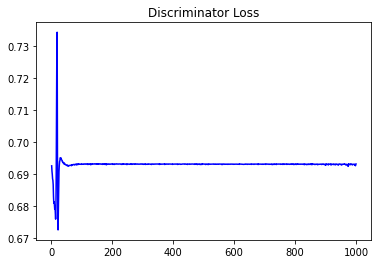

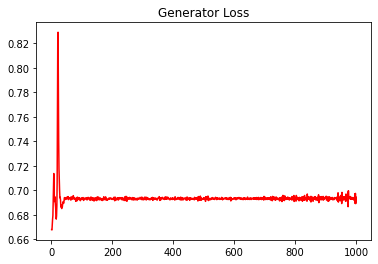

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.005885655376663916


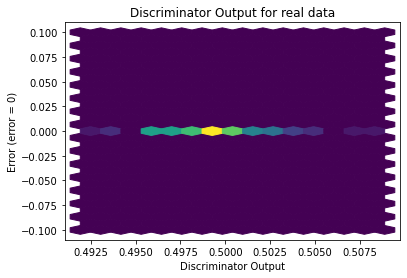

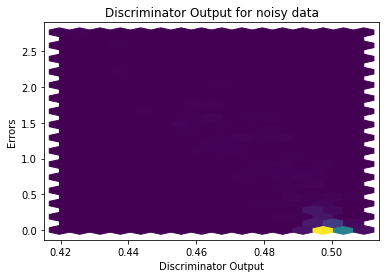

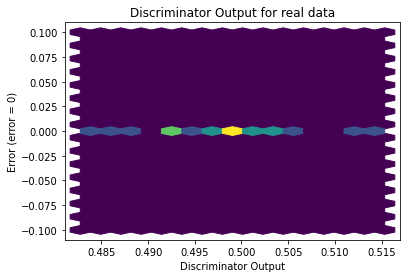

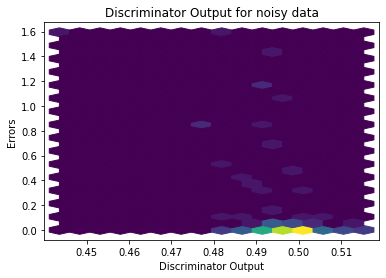

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


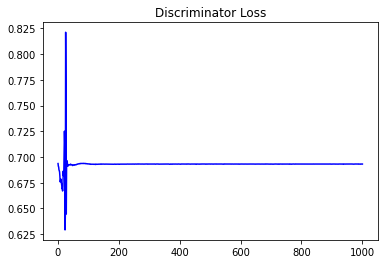

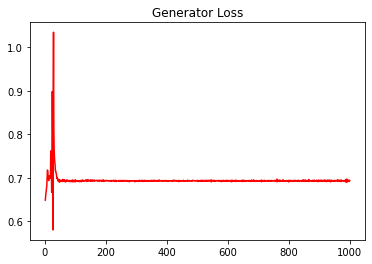

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.0032029119000409286


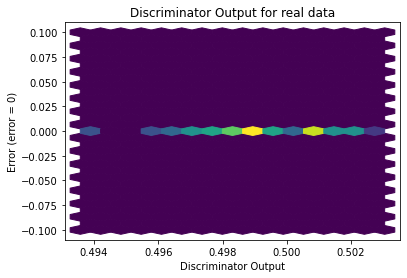

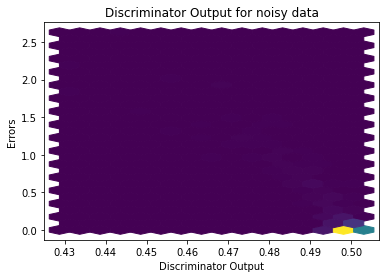

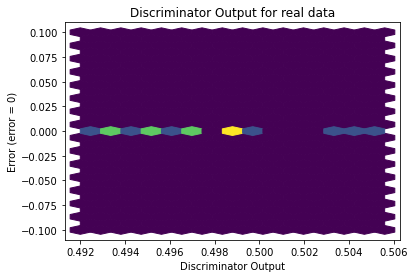

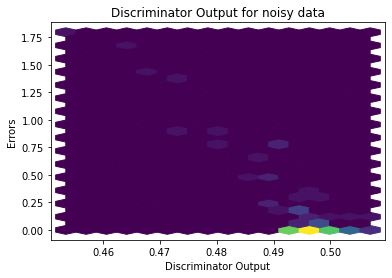

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7538]], requires_grad=True)
